Доходы от продаж, полученных в результате рекламной компании по ТВ, радио, газетам.

In [31]:
!py -m pip install yellowbrick


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\Svetlana\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from yellowbrick.regressor import PredictionError, ResidualsPlot
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)
print("libraries imported..")

libraries imported..


In [33]:
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [34]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [35]:
df.duplicated().sum()

0

In [36]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [38]:
df.drop(df.columns[[0]], axis = 1, inplace = True) 

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [40]:
df['sales']

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [13]:
df.TV.corr(df.sales)

0.7822244248616066

In [14]:

df.radio.corr(df.sales)

0.5762225745710553

In [15]:

df.newspaper.corr(df.sales)

0.22829902637616534

In [16]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot: >

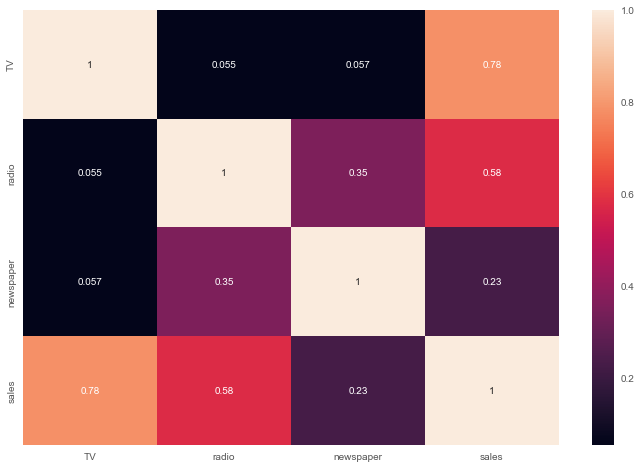

In [17]:

sns.heatmap(df.corr(),annot=True)

In [48]:
X = df[['newspaper']]
X.head()

,newspaper
0,69.2
1,45.1
2,69.3
3,58.5
4,58.4


In [49]:
y = df.sales
type(y)

pandas.core.series.Series

In [50]:
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [51]:
lr_m0 = LinearRegression()
lr_m0.fit(X_train, y_train)

LinearRegression()

In [52]:
print(lr_m0.intercept_)
print(lr_m0.coef_)

11.765576707409682
[0.06888299]


In [53]:
# b0,b1.увеличение расходов на 1 (для газет) связано с увеличением выручки на 0.068

In [54]:
y_pred = lr_m0.predict(X_test) 
y_pred[:5] 

array([14.36246531, 13.94227909, 12.27531081, 13.23967263, 13.83206631])

In [55]:
mean_squared_error(y_test, y_pred)

25.196780034607826

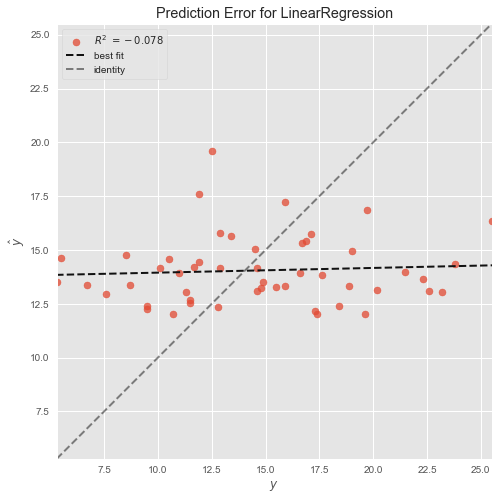

<AxesSubplot: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [56]:
visualizer = PredictionError(lr_m0)

#visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

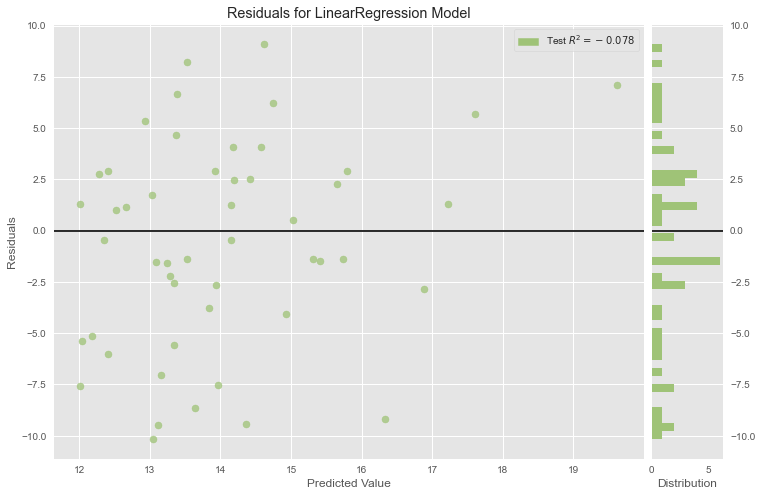

<AxesSubplot: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [57]:
visualizer = ResidualsPlot(lr_m0)
#visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.poof()

In [90]:
# добавить столбец x1*x2,x1*x3, x2*x3, x1^2, x2^2,x3^3, x1^(-1)...

In [27]:
df["TV*TV"] = df['TV']*df['TV']

In [28]:
df

,TV,radio,newspaper,sales,TV*TV
0,230.1,37.8,69.2,22.1,52946.01
1,44.5,39.3,45.1,10.4,1980.25
2,17.2,45.9,69.3,9.3,295.84
3,151.5,41.3,58.5,18.5,22952.25
4,180.8,10.8,58.4,12.9,32688.64
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,1459.24
196,94.2,4.9,8.1,9.7,8873.64
197,177.0,9.3,6.4,12.8,31329.00
198,283.6,42.0,66.2,25.5,80428.96
